- Plot averaged neuronal activities.
- With decision window of 10 steps, input of the first 3 steps, plotting 3 baseline steps, totaling 13 steps plotted.

/tmp/ipykernel_779250/3672420335.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  lc = LineCollection(lines, array=exp_steps, cmap=plt.cm.get_cmap("PRGn").reversed())


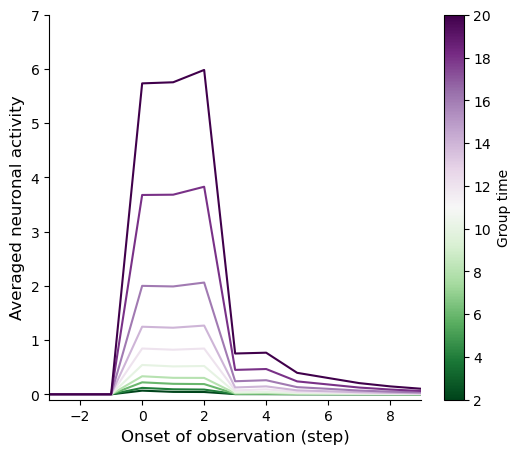

In [5]:
import math
import numpy as np
import pickle
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import pandas as pd

def normalization1(data):
    data = data - np.min(data)
    data = data/(np.max(np.abs(data), axis=1)[:,np.newaxis]+0.00001)
    return data
def c_mass(data):
    interval = 1
    mass_max = 0
    mass_loc = 0
    for i in range(math.ceil(len(data)-interval/2)):
        if np.sum(data[i:i+interval]) >= mass_max:
            mass_max = np.sum(data[i:i+interval])
            mass_loc = i + interval/2
    return (mass_loc, mass_max)
def sorting(base):
    B = np.argsort(base.sum(1))
    B = B[::-1]
    return B

def generate_gradient_colors(start_color, end_color, n):
    start_color = np.array([int(start_color[i:i+2], 16) for i in (0, 2, 4)])
    end_color = np.array([int(end_color[i:i+2], 16) for i in (0, 2, 4)])
    colors = [start_color + (end_color - start_color) * i / (n - 1) for i in range(n)]
    return ['#{:02x}{:02x}{:02x}'.format(int(c[0]), int(c[1]), int(c[2])) for c in colors]

# 生成从红色到蓝色的16进制颜色列表
colors = generate_gradient_colors('ff0000', '0000ff', 20)

fig, ax = plt.subplots()
lines = []
data = []
exp_steps = np.arange(2, 21, 2)
for ii in exp_steps:
    with open('/home/jiashuncheng/liuchenghao/MANN/MANN2/plot/data2/test_correct/test{}.pkl'.format(ii), 'rb') as a:
        x = pickle.load(a)['RSC']
    Y = np.stack(x)[:, :, :].T
    YY = Y.mean(0)[:, -13:]
    # Y = normalization1(Y)

    # 计算均值和方差
    mean_YY = YY.mean(0)
    std_YY = YY.std(0)

    xs = np.arange(-3, -3 + len(mean_YY))
    lines.append(np.column_stack([xs, mean_YY]))
    data.append(mean_YY)
lc = LineCollection(lines, array=exp_steps, cmap=plt.cm.get_cmap("PRGn").reversed())
ax.add_collection(lc)
ax.set_xlim(-3, 9)
ax.set_ylim(-0.1, 7)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlabel("Onset of observation (step)", size=12)
ax.set_ylabel("Averaged neuronal activity", size=12)
fig.colorbar(lc, label="Group time")
fig.set_size_inches(6, 5)
# fig.savefig("group_time.svg")

df = pd.DataFrame(data, columns=xs)
df.set_index(pd.Index(exp_steps, name='group_time'), inplace=True)
df.to_csv("1group_time.csv")

- Allow giving rc or wg as input to alter eta dymamics.
- Train the model with eta = 1, and test with different rc.

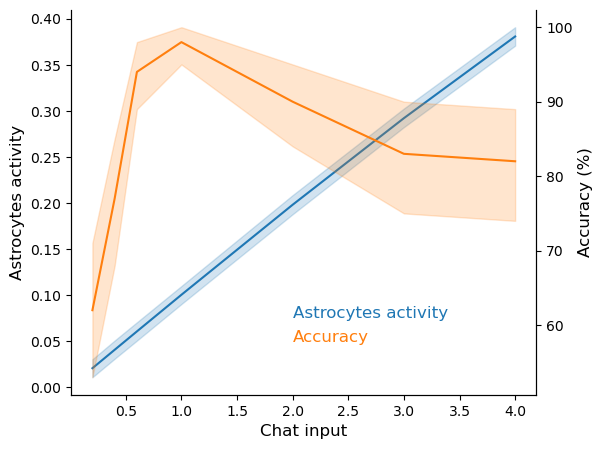

In [8]:
import math
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

rcs = np.array([0.2, 0.4, 0.6, 1, 2, 3, 4])
results = {'rc': [], 'g': [], 'acc': []}
for rc in rcs:
    with open(f'/home/jiashuncheng/liuchenghao/MANN/MANN2/plot/data2/test_eta/rc{rc:.1f}.pkl', 'rb') as a:
        objs = pickle.load(a)
        for x in objs:
            results['rc'].append(rc)
            results['g'].append(x['g'][-1].mean())
            results['acc'].append(x['acc'])
d1 = pd.DataFrame(results)
d1['acc'] = d1['acc'] * 100
fig1, ax1 = plt.subplots()
ax2 = ax1.twinx()
sb.lineplot(data=d1, x="rc", y="g", ax=ax1, color='C0', errorbar=('ci', 95))
sb.lineplot(data=d1, x='rc', y='acc', ax=ax2, color='C1', errorbar=('ci', 95))
ax1.set_ylabel("Astrocytes activity", size=12)
ax2.set_ylabel("Accuracy (%)", size=12)
ax1.set_xlabel("Chat input", size=12)
ax1.text(2, 0.075, "Astrocytes activity", color='C0', size=12)
ax1.text(2, 0.05, "Accuracy", color='C1', size=12)
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
fig1.set_size_inches(6, 5)
# fig1.savefig('chat_acc.svg')
d1.columns = ["chonlinergic_neuron", "asctrocyte", "accuracy"]
d1.to_csv("2chonlinergic.csv")

- In previous trained model, alter wg and plot accuracies.

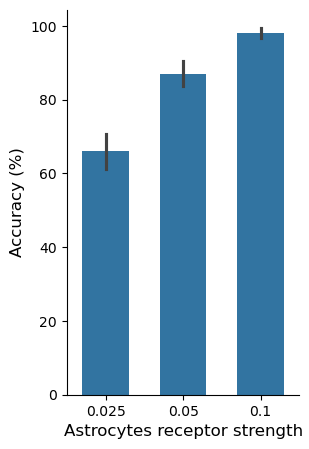

In [9]:
results = {'wg': [], 'acc': []}
wgs = [0.1, 0.05, 0.025]
for i, wg in enumerate(wgs):
    with open(f'/home/jiashuncheng/liuchenghao/MANN/MANN2/plot/data2/test_eta/wg{i}.pkl', 'rb') as a:
        objs = pickle.load(a)
        for x in objs:
            results['wg'].append(wg)
            results['acc'].append(x['acc'])
d2 = pd.DataFrame(results)
d2['acc'] = d2['acc'] * 100
fig2, ax3 = plt.subplots()
sb.barplot(data=d2, x="wg", y="acc", ax=ax3, errorbar='se', width=0.6)
ax3.set_ylabel("Accuracy (%)", size=12)
ax3.set_xlabel("Astrocytes receptor strength", size=12)
fig2.set_size_inches(3, 5)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
# fig2.savefig("astro_acc.svg")
d2.columns = ["asctrocyte_receptor", "accuracy"]
d2.to_csv("3asctrocyte_receptor.csv")

In [174]:
d2 = d2.astype(float)

In [175]:
from scipy import stats as stat
print("0.025 v 0.05")
print(stat.ttest_ind(d2.loc[d2['wg'] == 0.025, 'acc'], d2.loc[d2['wg'] == 0.05, 'acc']))
print("0.05 v 0.1")
print(stat.ttest_ind(d2.loc[d2['wg'] == 0.05, 'acc'], d2.loc[d2['wg'] == 0.1, 'acc']))

0.025 v 0.05
Ttest_indResult(statistic=-3.596665122026236, pvalue=0.0004070532261305416)
0.05 v 0.1
Ttest_indResult(statistic=-3.004518074849101, pvalue=0.003003705385738249)
